## 1. Load data

In [22]:
from os import getcwd ,chdir
chdir('/app')
import warnings
warnings.filterwarnings("ignore")
from pandas import DataFrame

from utils import load_binary_data, expand_label_cols


In [23]:
data: DataFrame = load_binary_data('new_df.pickle')
labels: DataFrame = load_binary_data('target.pickle')

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


## 2. Postprocess data

In [24]:
print(data.columns)
print(labels.columns)

Index(['spot', 'patient2', 'a01', 'a02', 'a05', 'a06', 'a08', 'a09', 'a10',
       'a11',
       ...
       'b31_0.0', 'b31_1.0', 'b31_2.0', 'b31_3.0', 'b31_4.0', 'b31_5.0',
       'c02_1.0', 'c02_2.0', 'c02_3.0', 'c02_9.0'],
      dtype='object', length=121)
Index(['E2H', 'E2R', 'E2S', 'E2E', 'E2O', 'E2K', 'ny'], dtype='object')


In [25]:
labels['count']=labels['E2H']+labels['E2R']+labels['E2S']+labels['E2E']+labels['E2O']+labels['E2K']
labels['count'].value_counts()

count
0    1064
1     245
2     103
3      53
4      34
5      15
6      12
Name: count, dtype: int64

In [26]:
expand_label_cols(labels)

serious
False    1309
True      217
Name: count, dtype: int64
morethan3
False    1412
True      114
Name: count, dtype: int64


## 3. Visualization

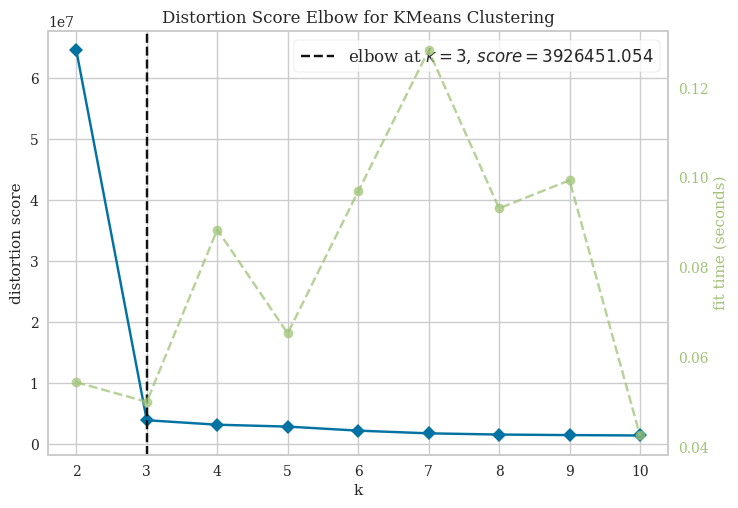

In [27]:
from importlib import import_module, reload
visualiztion = import_module("visualization")
reload(visualiztion)
# from visualization import Ploter

ploter = visualiztion.Ploter()
ploter.plot_KELbow(data)

In [28]:
from sklearn.cluster import DBSCAN
data_dbscan_clusted = DBSCAN(eps=0.00001, min_samples=3).fit(data)
data['db']=data_dbscan_clusted.labels_

In [29]:
data['db'].value_counts()

db
-1    1526
Name: count, dtype: int64

### fitting data

In [30]:
learning = import_module("learning")
reload(learning)

learner = learning.Learner()

# decomposition
t_sne_data = learner.tsne(data, n_components=2, perplexity=100)
pca_data = learner.pca(data, n_components=2)
isomap_data = learner.isomap(data, n_components=2, n_neighbors=30)
umap_data = learner.umap(data, n_neighbors=30, min_dist=0.1)

kmeans = learner.kmeans(data, n_clusters=3, random_state=0)
cluster=kmeans.labels_
print(cluster)


[1 1 1 ... 1 0 0]


### plotting

In [31]:
reload(visualiztion)
ploter = visualiztion.Ploter()

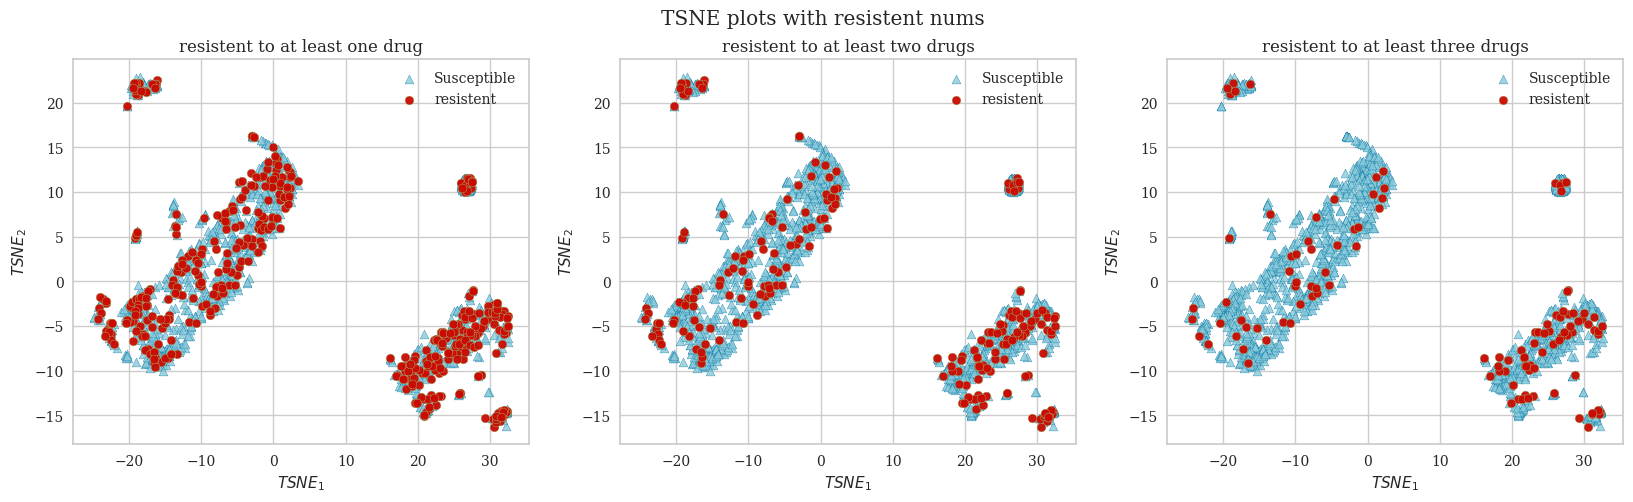

In [32]:

ploter.plot_labeled_2D_data(t_sne_data, labels, 'TSNE plots with resistent nums', '$TSNE_{1}$', '$TSNE_{2}$')

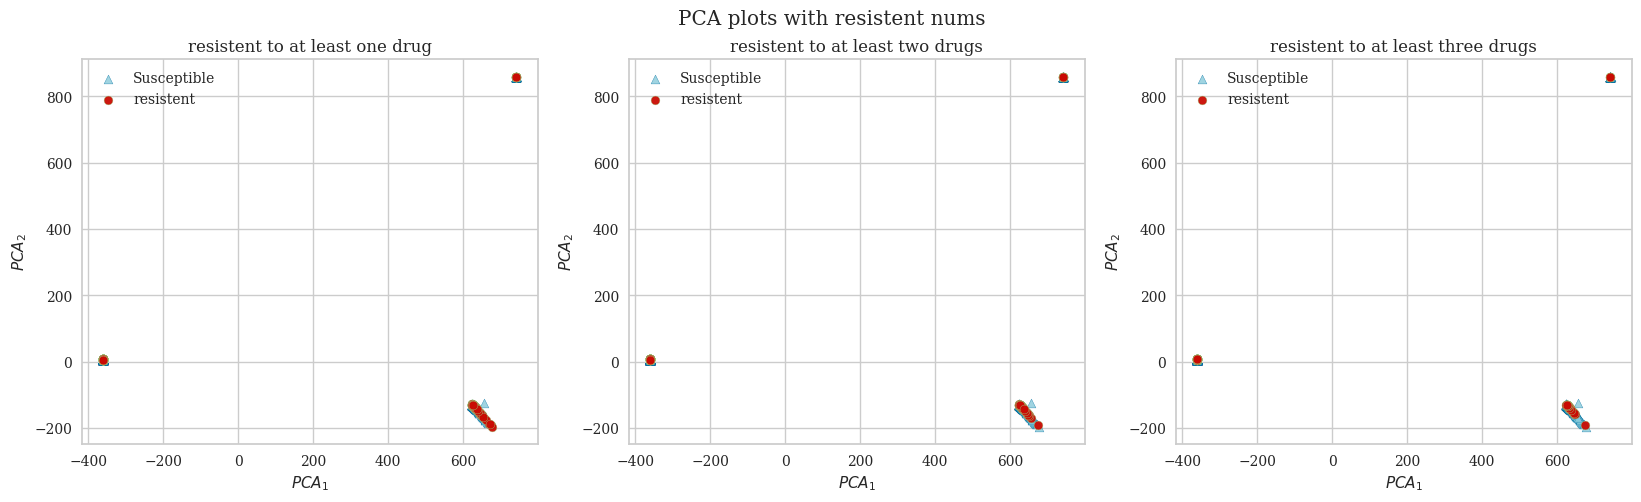

In [33]:
ploter.plot_labeled_2D_data(pca_data, labels, 'PCA plots with resistent nums', '$PCA_{1}$', '$PCA_{2}$')

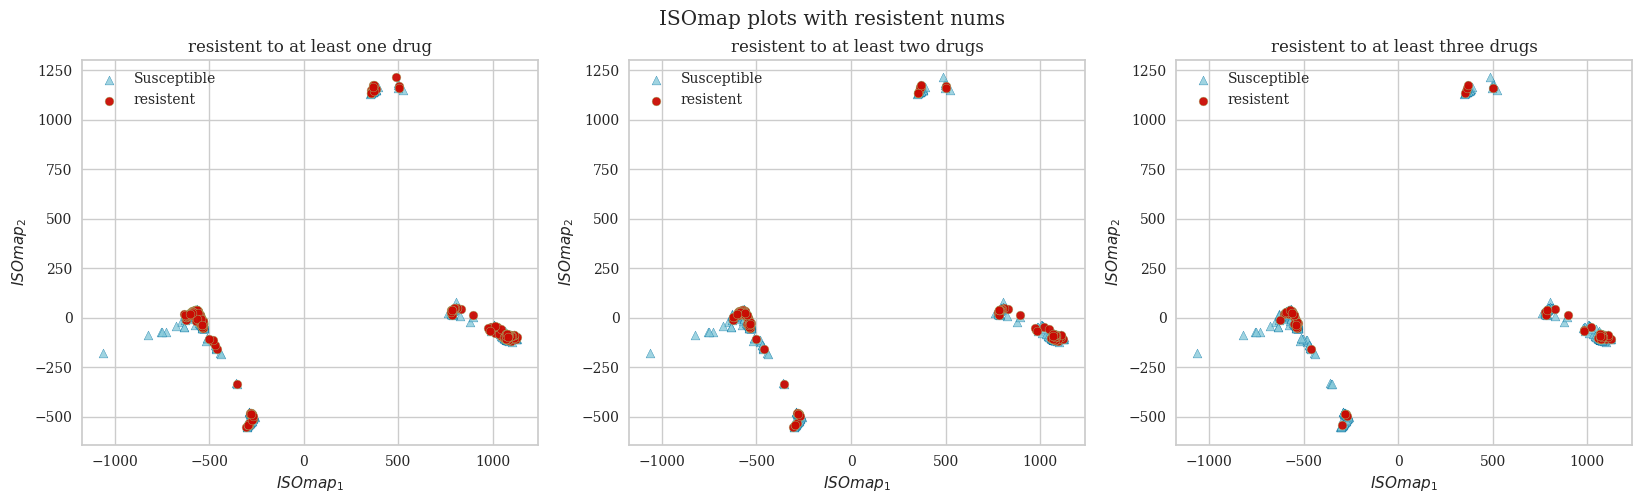

In [34]:
ploter.plot_labeled_2D_data(isomap_data, labels, 'ISOmap plots with resistent nums', '$ISOmap_{1}$', '$ISOmap_{2}$')

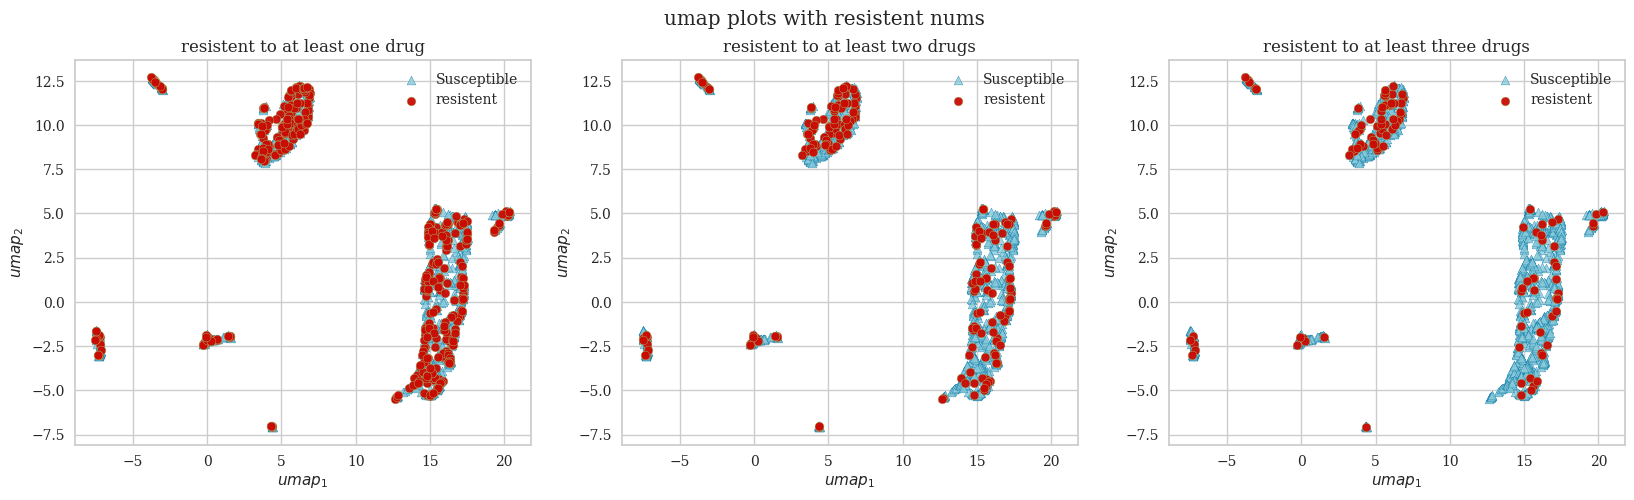

In [35]:
ploter.plot_labeled_2D_data(umap_data, labels, 'umap plots with resistent nums', '$umap_{1}$', '$umap_{2}$')

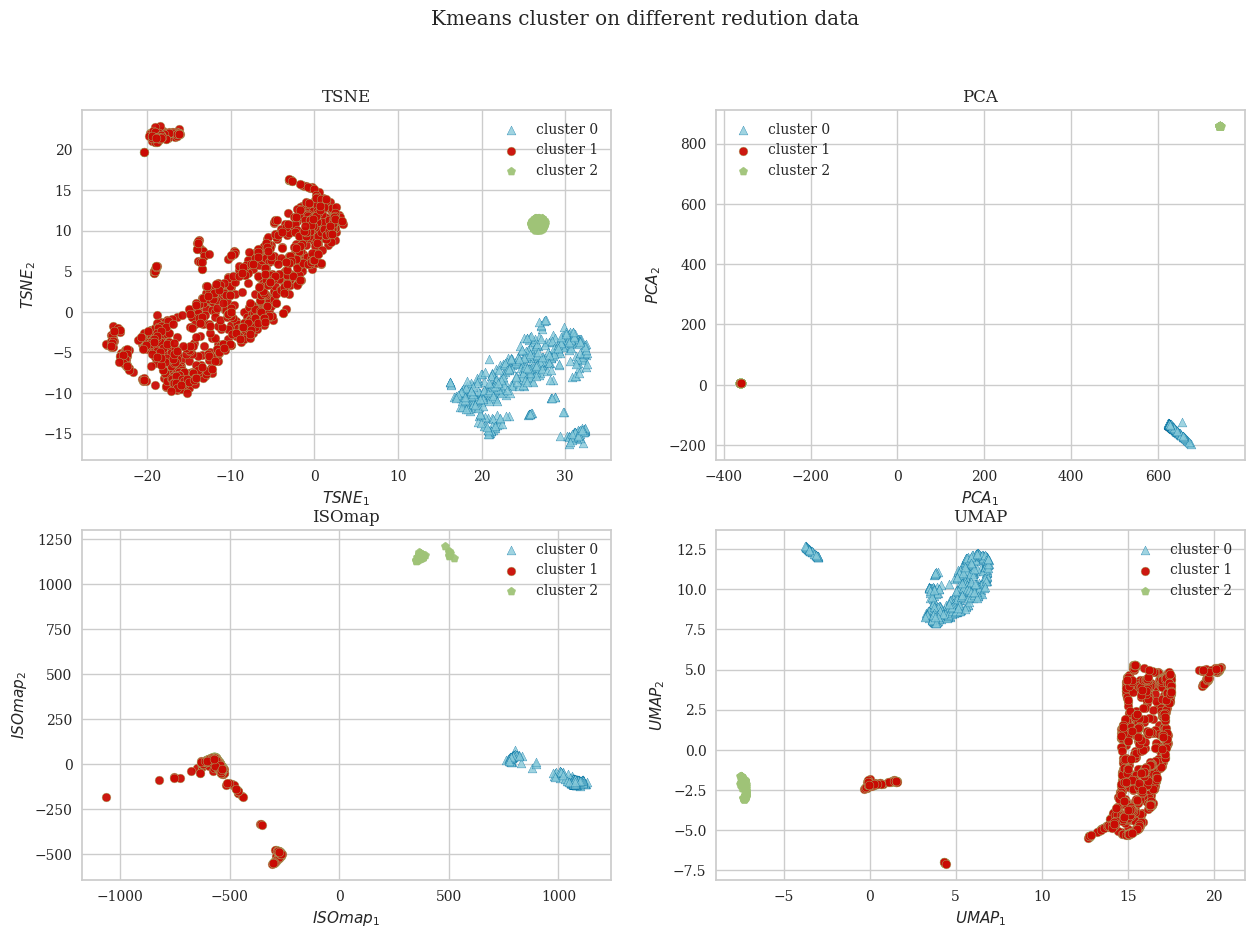

In [36]:
reload(visualiztion)
ploter = visualiztion.Ploter()
manifold_datas = {
    'TSNE': t_sne_data,
    'PCA': pca_data,
    'ISOmap': isomap_data,
    'UMAP': umap_data
}
ploter.plot_Kmeans_2D_data(cluster, manifold_datas, title='Kmeans cluster on different redution data')

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import catboost as cb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import numpy as np
from imblearn.combine import SMOTEENN
from sklearn.manifold import TSNE
from imblearn.combine import SMOTETomek
from collections import Counter
# from imblearn.ensemble import BalanceCascade 
# from costcla.metrics import binary_classification_metrics
from sklearn.pipeline import make_pipeline
from skrebate import ReliefF
from sklearn.decomposition import MiniBatchSparsePCA
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import NearMiss 
from imblearn.ensemble import EasyEnsemble
from imblearn.ensemble import BalancedBaggingClassifier 
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import RUSBoostClassifier
from imblearn.over_sampling import ADASYN 
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import     OneSidedSelection
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import AllKNN
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import InstanceHardnessThreshold
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import Isomap
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import MDS
from skrebate import MultiSURFstar
from sklearn.metrics import hamming_loss
from sklearn.model_selection import GridSearchCV
from costcla.metrics import savings_score, cost_loss
from boruta import BorutaPy
import shap
from skrebate.turf import TuRF
from sklearn.feature_selection import RFE
import numpy as np
from numpy.core.umath_tests import inner1d
from sklearn.ensemble import AdaBoostClassifier

ImportError: cannot import name 'EasyEnsemble' from 'imblearn.ensemble' (/p_3_10/lib/python3.10/site-packages/imblearn/ensemble/__init__.py)